# Classification Model - Car Dataset
## by Tanishq Kaushik

## To generate an HTML - run "jupyter nbconvert Car_Classification_Tree/Car_Classificaiton_Tree.ipynb --to html" in Terminal

## Data Cleaning and Preparation

In [37]:
# Loading librarie
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [38]:
# Importing the dataset
df = pd.read_csv('car_dataset.csv')
df.head()

Unnamed: 0     make  model  year         owner transmission    fuel  \
0           0   Maruti  Swift  2014   First Owner       Manual  Diesel   
1           1    Skoda  Rapid  2014  Second Owner       Manual  Diesel   
2           2    Honda   City  2006   Third Owner       Manual  Petrol   
3           3  Hyundai    i20  2010   First Owner       Manual  Diesel   
4           4   Maruti  Swift  2007   First Owner       Manual  Petrol   

    engine   max_power  seats  km_driven seller_type price_category  
0  1248 CC      74 bhp    5.0     145500  Individual         Medium  
1  1498 CC  103.52 bhp    5.0     120000  Individual         Medium  
2  1497 CC      78 bhp    5.0     140000  Individual            Low  
3  1396 CC      90 bhp    5.0     127000  Individual            Low  
4  1298 CC    88.2 bhp    5.0     120000  Individual            Low

In [39]:
# The number of rows and columns in the dataset
print('The number of Rows in the dataset:' , df.shape[0])
print('The number of Columns in the dataset:', df.shape[1])

The number of Rows in the dataset: 8128
The number of Columns in the dataset: 13


In [40]:
# Removing all the nan values
df = df.dropna()

# The number of rows after removing the null values
print('The number of Rows in the dataset after dropping the null rows:' , df.shape[0])

The number of Rows in the dataset after dropping the null rows: 7907


In [41]:
# Dropping CC from the engine column and creating a new column called engine in CC
engine_df = df.engine.str.extract('([^a-zA-Z]+)([a-zA-Z]+)', expand=True)
engine_df.columns = ['engine in CC', 'Text']
engine_df = engine_df.drop('Text', axis=1)

In [42]:
# Adding the engine in CC column to the data frame
df = pd.concat([df, engine_df], axis=1)

In [43]:
# Turning 'engine in CC' to float for the model
df['engine in CC'] = df['engine in CC'].astype(float)

In [44]:
# Dropping bhp from the engine column and creating a new column called max_power in bhp

max_power_df = df.max_power.str.extract('([^a-zA-Z]+)([a-zA-Z]+)', expand=True)
max_power_df.columns = ['max_power in bhp', 'Text']
max_power_df = max_power_df.drop('Text', axis=1)

In [45]:
# Converting max_power in bhp to float for the model

max_power_df['max_power in bhp'] = max_power_df['max_power in bhp'].str.extract('(\d+)', expand=False)
max_power_df['max_power in bhp'] = max_power_df['max_power in bhp'].astype(float)

In [46]:
# Adding the max_power in bhp column to the data frame
df = pd.concat([df, max_power_df], axis=1)

In [47]:
# DataFrame with the new variables
df.head()

Unnamed: 0     make  model  year         owner transmission    fuel  \
0           0   Maruti  Swift  2014   First Owner       Manual  Diesel   
1           1    Skoda  Rapid  2014  Second Owner       Manual  Diesel   
2           2    Honda   City  2006   Third Owner       Manual  Petrol   
3           3  Hyundai    i20  2010   First Owner       Manual  Diesel   
4           4   Maruti  Swift  2007   First Owner       Manual  Petrol   

    engine   max_power  seats  km_driven seller_type price_category  \
0  1248 CC      74 bhp    5.0     145500  Individual         Medium   
1  1498 CC  103.52 bhp    5.0     120000  Individual         Medium   
2  1497 CC      78 bhp    5.0     140000  Individual            Low   
3  1396 CC      90 bhp    5.0     127000  Individual            Low   
4  1298 CC    88.2 bhp    5.0     120000  Individual            Low   

   engine in CC  max_power in bhp  
0        1248.0              74.0  
1        1498.0             103.0  
2        1497.0              78.0  
3        1396.0              90.0  
4        1298.0              88.0

## Data Transformation

In [48]:
# Creating dummy variables using the categorical columns
one_hot_data = pd.get_dummies(df[['make','model','owner','transmission','fuel','seller_type']],drop_first=False)
one_hot_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7907 entries, 0 to 8127
Columns: 242 entries, make_Ambassador to seller_type_Trustmark Dealer
dtypes: uint8(242)
memory usage: 1.9 MB


In [49]:
# Checking the total number of dummy columns generated
print('The number of dummy variable columns in the dataset:', one_hot_data.shape[1])

The number of dummy variable columns in the dataset: 242


In [50]:
# Creating another df with numeric columns
df_numeric = df[['year','seats','km_driven','engine in CC','max_power in bhp']]

In [51]:
# Creating a df both numeric and dummy columns
df_with_dummy = pd.concat([df_numeric, one_hot_data], axis=1)
df_with_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7907 entries, 0 to 8127
Columns: 247 entries, year to seller_type_Trustmark Dealer
dtypes: float64(3), int64(2), uint8(242)
memory usage: 2.2 MB


In [52]:
# Creating a separate df using the target variable
price_category_df = df[['price_category']]

In [53]:
# The final data frame with all the components required to run the model
final_df = pd.concat([df_with_dummy,price_category_df], axis =1)

In [54]:
# Getting rid of all infinity and nan values so that the model can run

# Replacing all infinity values with nan values
final_df.replace([np.inf, -np.inf], np.nan, inplace=True)


# Removing all nan values
final_df = final_df.dropna()

In [55]:
#Creating a feature variables dataframe with all the explanatory variables
feature_df = final_df.loc[:, final_df.columns != "price_category"]

## Carrying out the Test Train Split

In [56]:
#Splitting dataset in features and target variable

X = feature_df # Features
y = final_df.price_category # Target variable


### Randomly split the dataset (X and y) into Train (75%) and Test Set (25%).

In [57]:
# Split dataset into training set and test set
# Using random_state = 1 as seed to generate consistent results

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [58]:
# The dimension of the train set
print('The dimension of train set is:' , X_train.shape)


The dimension of train set is: (5534, 247)


In [59]:
# The dimensions of the test set
print('The dimension of test set is:' , X_test.shape)

The dimension of test set is: (2372, 247)


## Building Classification Models

In [60]:
# Creating Decision Tree classifer object with gini as criteria
clf = DecisionTreeClassifier(criterion='gini')

# Training Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predicting the response for test dataset
y_pred = clf.predict(X_test)

In [61]:
# Evaluating the trees performance
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9005059021922428


In [62]:
# Installing modules for creating graph
%pip install graphviz
%pip install pydotplus

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [63]:
# Extracting all the column names to be used with the graphs

column_headers = list(feature_df.columns.values)

### Visualizing the tree

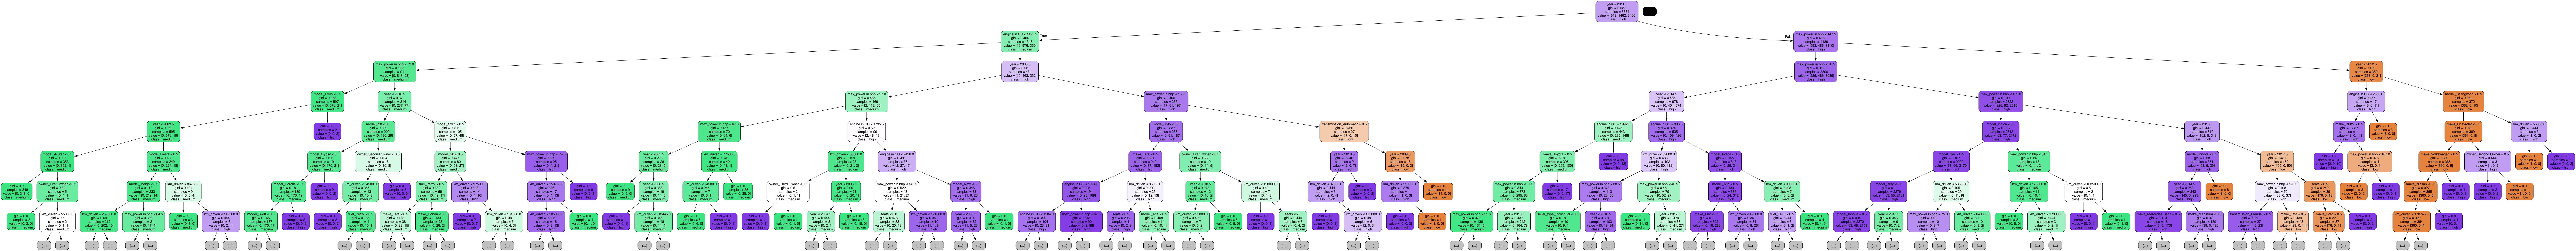

In [64]:
# Can only display max_depth to a certain level or a memeory error is returned

from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = column_headers,class_names=['low','medium','high'], max_depth= 7)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('cars.png')
Image(graph.create_png())

In [65]:
# Repeating the problem with entropy as criteria

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy")

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9034569983136593


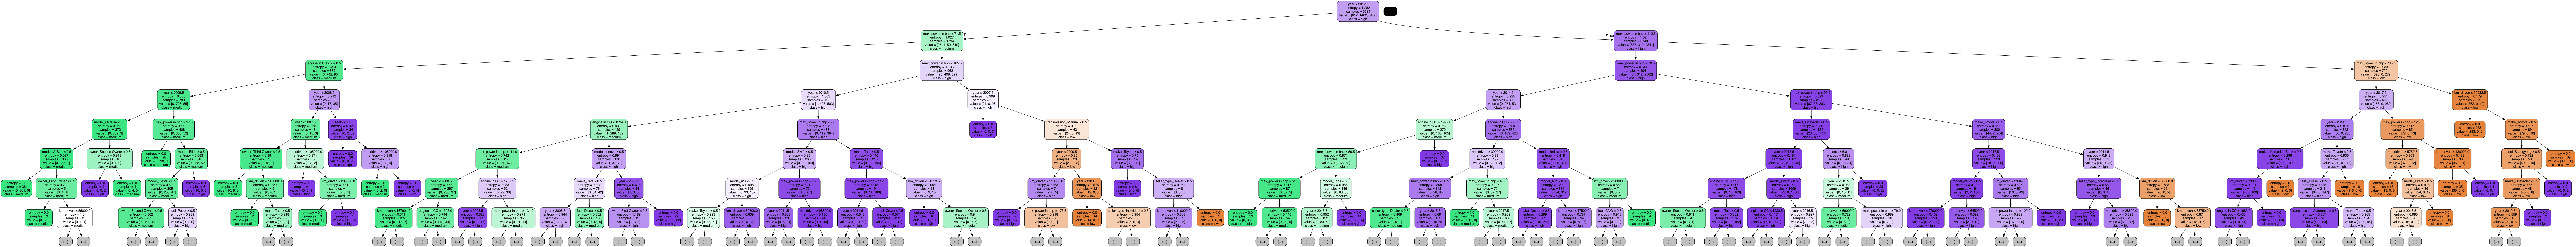

In [66]:
# Can only display max_depth to a certain level or a memeory error is returned
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = column_headers,class_names=['low','medium','high'],max_depth=7)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('cars_entropy.png')
Image(graph.create_png())

### Gini has a higher accuracy score of 0.9038785834738617 on comparing with the accuracy score of entropy 0.8988195615514334.

## Checking the effect of max_depth on the tree's performance

In [67]:
# Repeating the problem with max_depth = 3

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.8309443507588533


In [68]:
# Repeating the problem with max_depth = 5

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=5)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8815345699831366


In [69]:
# Repeating the problem with max_depth = 7

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=7)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.893760539629005


### The accuracy score is increasing with increase in max_depth.

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
# Using none of the criteria for the random forest as this option is provides the highest accuracy score

clf = RandomForestClassifier()

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9123102866779089


In [72]:
# Random forest with n_estimators = 10

clf = RandomForestClassifier(n_estimators=10)

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9051433389544689


### Random forest provides the higest accuracy score without any hyperparameters. On just using 10 estimators the accuracy score goes down. The accuracy score is the lower for decision trees when compared to random forest.